### Práctica 2: Regresión lineal.

- Grupo 1:
    - Jesús María Matos Torres.
    - Carlos Santana Esplá.

## Ejercicio 1: Estimación por regresión lineal.

In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


datos = pd.read_csv("./datos practicas/Aprendizaje-Automatico-I-main/Practica 2/tiempos.csv", sep = ';')
time_array = np.array(datos)
for row in range(len(time_array)):
    for colum in range(len(time_array[row])):
        hour, minutes, segundos = time_array[row][colum].split(':')
        time_array[row][colum] = int(hour)*60 + int(minutes)

- Primero leemos el csv y aplicamos con sep, un separador que nos divide en columnas cuando se encuentra un ; en el csv. Después analizamos los datos y lo pasamos todo a minutos, desechando los segundos ya que nos crearía valores enteros y son más complejos de tratar.

In [92]:
train, test = train_test_split(time_array, test_size = 0.3, train_size = 0.7)
xtrain = []
ytrain = []
xtest = []
ytest = []
for i in range(len(train)):
    xtrain.append(train[i][0:6])
    ytrain.append(train[i][6])
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)


for values in range(len(test)):
    xtest.append(test[values][0:6])
    ytest.append(test[values][6])
xtest = np.array(xtest)
ytest = np.array(ytest)



- En esta celda, entrenamos nuestro programa para en las celdas venideras analizar el error cuadrático de las predicciones.


In [93]:
coef_centr = []
coef_no_centr = []

reg_centr = LinearRegression().fit(xtrain, ytrain)
print(reg_centr.score(xtrain,ytrain))
ypred = reg_centr.predict(xtest)
ypred

coef_centr.append(reg_centr.intercept_)
for i in reg_centr.coef_:
    coef_centr.append(i)

reg_no_centr = LinearRegression(fit_intercept=False).fit(xtrain, ytrain)
print(reg_no_centr.score(xtrain,ytrain))
ypred2 = reg_no_centr.predict(xtest)
ypred2

coef_no_centr.append(reg_no_centr.intercept_)
for j in reg_no_centr.coef_:
    coef_no_centr.append(j)

0.9939573761062884
0.9938534034828903
[14.392544371478607, -0.019426590532632747, -0.2967910768325783, 0.1333662020134737, 0.088914528236768, -0.5381764544150881, 1.5095871743357807] [0.0, 0.26322649679873333, -0.54159254960878, 0.23765614366980933, 0.1054166809434563, -0.5658927124372152, 1.5075393161169575]


- Calculado el coeficiente de determinación de la relación, muy cercano a uno en este caso, y predecimos los resultados a partir de nuestros test, que a continuación comprobaremos su error cuadrático medio.

In [94]:
print(mean_squared_error(ytest, ypred, squared=False))
print(mean_squared_error(ytest, ypred2, squared=False))

10.948175350563337
10.261426839540048


- Como vemos el error es elevado, por lo que si hay correlación entre el coeficiente de determinación de la relación y el error cuadrático medio

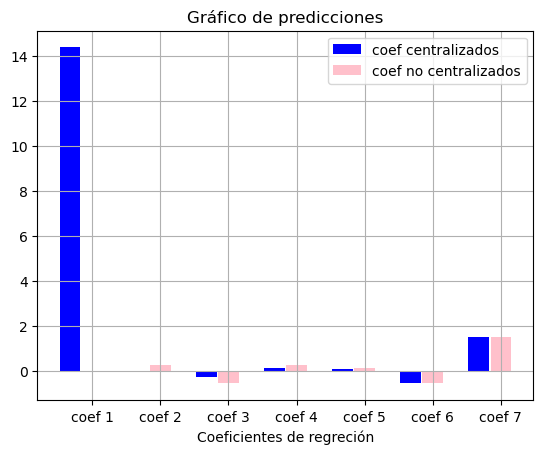

In [96]:
import matplotlib.pyplot as plt

ax = plt.subplot()
position = np.arange(len(coef_no_centr))

ax.bar(position-0.65/2, coef_centr, width=0.3, color='blue')
ax.bar(position, coef_no_centr, width=0.3, color='pink')
ax.set_xlabel('Coeficientes de regreción')
ax.set_xticks(position)
ax.set_xticklabels(['coef 1', 'coef 2', 'coef 3', 'coef 4', 'coef 5', 'coef 6', 'coef 7'])
ax.legend(['coef centralizados', 'coef no centralizados'])
ax.set_title('Gráfico de predicciones')
ax.grid()
plt.show()

- Creamos dos listas en las que añadiremos los pesos, cuando los datos estén centralizado y cuando no. Con estos datos sacamos la siguiente gráfica de barras.



## Ejercicio 2: Estimación por regresión lineal con regularización.

- partimos de los datos calculados en el ejercicio anterior.

In [97]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

coef_centr = []
coef_no_centr = []

for i in range(2):
    clf = Ridge(alpha=i,fit_intercept=True)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    coef_centr.append(clf.intercept_)
    for j in clf.coef_:
        coef_centr.append(j)
    print("Alpha centr =", i, "->", mean_squared_error(ytest, ypred, squared=False))
    

    clf2 = Ridge(alpha=i,fit_intercept=False)
    clf2.fit(xtrain, ytrain)
    ypred2 = clf2.predict(xtest)
    coef_no_centr.append(clf2.intercept_)
    for j in clf2.coef_:
        coef_no_centr.append(j)
    print("Alpha no centr =", i, "->", mean_squared_error(ytest, ypred2, squared=False))

Alpha centr = 0 -> 10.94817535056206
Alpha no centr = 0 -> 10.261426839542569
Alpha centr = 1 -> 10.948060287115629
Alpha no centr = 1 -> 10.261037357687478


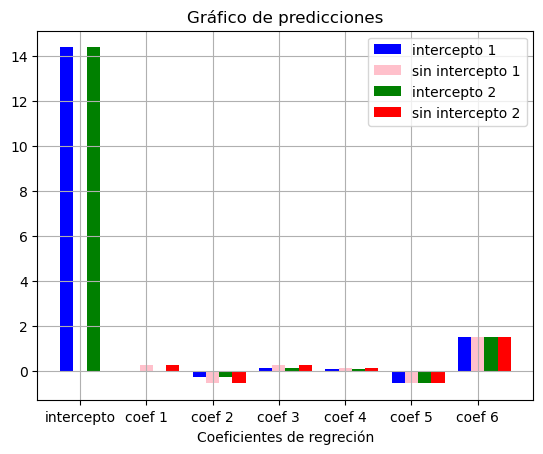

In [101]:
ax = plt.subplot()
coef_inter1 = coef_centr[0:7]
coef_inter2 = coef_centr[7:]
coef_sin_inter1 = coef_no_centr[0:7]
coef_sin_inter2 = coef_no_centr[7:]
position = np.arange(len(coef_inter1))


ax.bar(position-0.4/2, coef_inter1, width=0.2, color='blue')
ax.bar(position, coef_sin_inter1, width=0.2, color='pink')
ax.bar(position+0.4/2, coef_inter2, width=0.2, color='green')
ax.bar(position+0.8/2, coef_sin_inter2, width=0.2, color='red')
ax.set_xlabel('Coeficientes de regreción')
ax.set_xticks(position)
ax.set_xticklabels(['intercepto', 'coef 1', 'coef 2', 'coef 3', 'coef 4', 'coef 5', 'coef 6'])
ax.legend(['intercepto 1', 'sin intercepto 1', 'intercepto 2', 'sin intercepto 2'])
ax.set_title('Gráfico de predicciones')
ax.grid()
plt.show()

- Creamos dos listas y mediante un bucle vamos modificando alfa, con esto hallamos los distintos valores, con y sin peso cero. Acto seguido realizamos un barplot con estas listas para su análisis.

In [102]:
alpha = [0.1, 5]
coef_centr = []
coef_no_centr = []

for i in range(len(alpha)):
    clf = Lasso(alpha=alpha[i],fit_intercept=True)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    coef_centr.append(clf.intercept_)
    for j in clf.coef_:
        coef_centr.append(j)
    print("Alfa centr =", alpha[i], "->", mean_squared_error(ytest, ypred, squared=False))
    

    clf2 = Lasso(alpha=alpha[i],fit_intercept=False)
    clf2.fit(xtrain, ytrain)
    ypred2 = clf2.predict(xtest)
    coef_no_centr.append(clf2.intercept_)
    for j in clf2.coef_:
        coef_no_centr.append(j)
    print("Alfa no centr =", alpha[i], "->", mean_squared_error(ytest, ypred2, squared=False))

Alfa centr = 0.1 -> 10.978844181670764
Alfa no centr = 0.1 -> 20.841301629076966
Alfa centr = 5 -> 10.898656132334484
Alfa no centr = 5 -> 20.683321187055352


C:\Users\fenix\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.528e+03, tolerance: 6.099e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\fenix\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.541e+04, tolerance: 1.444e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\fenix\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.667e+04, toleranc

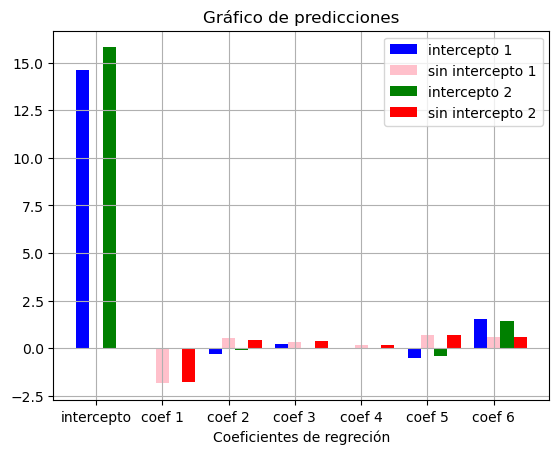

In [103]:
ax = plt.subplot()
coef_inter1 = coef_centr[0:7]
coef_inter2 = coef_centr[7:]
coef_sin_inter1 = coef_no_centr[0:7]
coef_sin_inter2 = coef_no_centr[7:]
position = np.arange(len(coef_inter1))


ax.bar(position-0.4/2, coef_inter1, width=0.2, color='blue')
ax.bar(position, coef_sin_inter1, width=0.2, color='pink')
ax.bar(position+0.4/2, coef_inter2, width=0.2, color='green')
ax.bar(position+0.8/2, coef_sin_inter2, width=0.2, color='red')
ax.set_xlabel('Coeficientes de regreción')
ax.set_xticks(position)
ax.set_xticklabels(['intercepto', 'coef 1', 'coef 2', 'coef 3', 'coef 4', 'coef 5', 'coef 6'])
ax.legend(['intercepto 1', 'sin intercepto 1', 'intercepto 2', 'sin intercepto 2'])
ax.set_title('Gráfico de predicciones')
ax.grid()
plt.show()

- Como modelo de regresión lineal con regularización L1, efectuamos lo mismo que con con regularización L2 (caso Ridge).

- Por último, com conclusión general, observamos que el error cuadrático medio en todos los métodos utilizados, es aproximadamente similir, siempre dependiendo de como se efectue la mezcla en los datos de entrenamiento. 